## Question 1

#### a)

In [106]:
using RDatasets;

data = dataset("car", "Davis");
first(data, 5)

Row,Sex,Weight,Height,RepWt,RepHt
,Cat…,Int32,Int32,Int32?,Int32?
1,M,77,182,77,180
2,F,58,161,51,159
3,F,53,161,54,158
4,M,68,177,70,175
5,F,59,157,59,155


In [107]:
data

Row,Sex,Weight,Height,RepWt,RepHt
,Cat…,Int32,Int32,Int32?,Int32?
1,M,77,182,77,180
2,F,58,161,51,159
3,F,53,161,54,158
4,M,68,177,70,175
5,F,59,157,59,155
6,M,76,170,76,165
7,M,76,167,77,165
8,M,69,186,73,180
9,M,71,178,71,175


#### b)

In [108]:
using Statistics;

In [109]:
data = data[:, [:Weight, :Height]];
data = Matrix{Float64}(data);

In [110]:
mu_weight = mean(data[:, 1]);
mu_height = mean(data[:, 2]);
var_weight = mean((data[:, 1] .- mu_weight).^2);
var_height = mean((data[:, 2] .- mu_height).^2);

println("Weight: mean = $mu_weight, variance = $var_weight");
println("Height: mean = $mu_height, variance = $var_height");

Weight: mean = 65.8, variance = 226.71999999999997
Height: mean = 170.02, variance = 143.46959999999996


#### c)

In [111]:
using Plots;

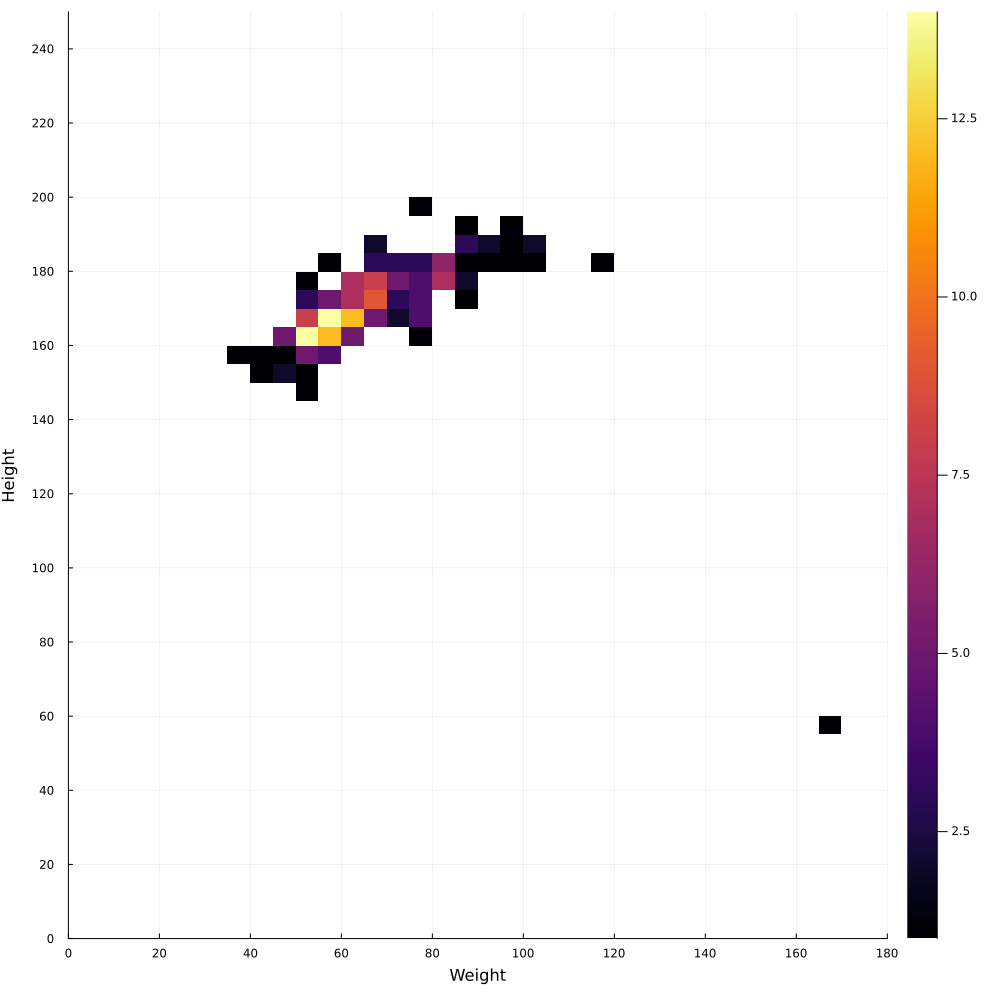

In [168]:
gr(size = (1000, 1000))
histogram2d(
    data[:, 1], data[:, 2],
    nbins=40,
    xaxis=("Weight", (0, 180), 0:20:180),
    yaxis=("Height", (0, 250), 0:20:250),
)

#### d)

In [113]:
data # (weight, height)

200×2 Matrix{Float64}:
 77.0  182.0
 58.0  161.0
 53.0  161.0
 68.0  177.0
 59.0  157.0
 76.0  170.0
 76.0  167.0
 69.0  186.0
 71.0  178.0
 65.0  171.0
  ⋮    
 89.0  173.0
 59.0  164.0
 51.0  156.0
 62.0  164.0
 74.0  175.0
 83.0  180.0
 81.0  175.0
 90.0  181.0
 79.0  177.0

In [141]:
mu = mean(data, dims=1);
cov = (data .- mu)' * (data .- mu) / size(data, 1);

println("Mean = $mu\n");
print("Covariance:");
cov

Mean = [65.8 170.02]

Covariance:

2×2 Matrix{Float64}:
 226.72    34.204
  34.204  143.47

#### e)

In [146]:
using Distributions;

In [151]:
mu

1×2 Matrix{Float64}:
 65.8  170.02

In [154]:
mu'

2×1 adjoint(::Matrix{Float64}) with eltype Float64:
  65.8
 170.02

In [152]:
mu[:]

2-element Vector{Float64}:
  65.8
 170.02

In [159]:
d = MvNormal(mu[:], cov);
sample = rand(d, 1000)

2×1000 Matrix{Float64}:
  40.3563   67.3039   61.9032   65.5276  …   61.4591   63.9006   78.3129
 162.153   195.755   171.29    172.942      156.989   162.212   193.433

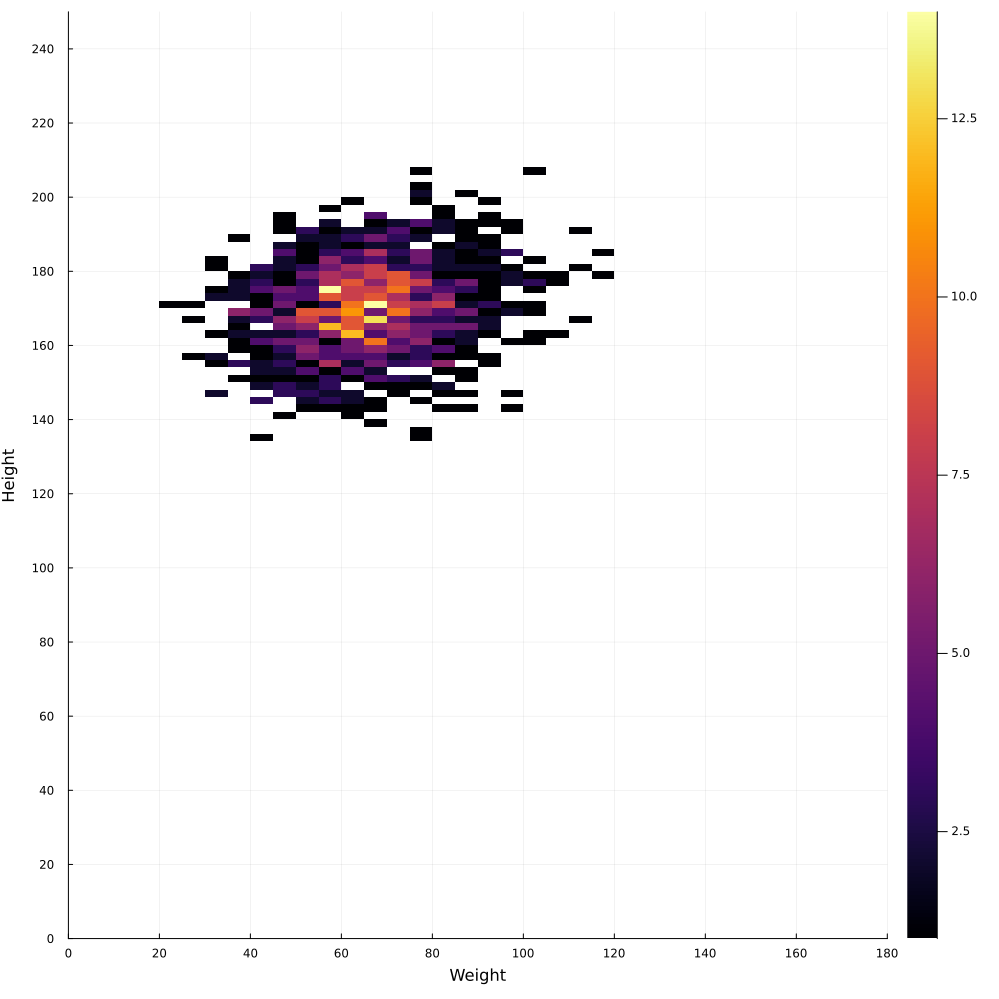

In [169]:
myplot = histogram2d(
    sample[1, :], sample[2, :],
    nbins=40,
    xaxis=("Weight", (0, 180), 0:20:180),
    yaxis=("Height", (0, 250), 0:20:250),
)

## Question 2

#### a)

In [ ]:
iris = dataset("datasets", "iris");
groups = groupby(iris, :Species);
new_iris = vcat(groups[2], groups[3]) # versicolor, virginica

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,7.0,3.2,4.7,1.4,versicolor
2,6.4,3.2,4.5,1.5,versicolor
3,6.9,3.1,4.9,1.5,versicolor
4,5.5,2.3,4.0,1.3,versicolor
5,6.5,2.8,4.6,1.5,versicolor
6,5.7,2.8,4.5,1.3,versicolor
7,6.3,3.3,4.7,1.6,versicolor
8,4.9,2.4,3.3,1.0,versicolor
9,6.6,2.9,4.6,1.3,versicolor


#### b)

In [175]:
using Gadfly;

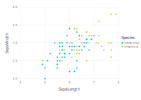

In [180]:
Gadfly.plot(
    new_iris, 
    x=:SepalLength, y=:SepalWidth, 
    color=:Species, 
    Geom.point,
    Theme(background_color="white")
)